In [165]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.datasets import fetch_california_housing, load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd

First I will run the analysis on the iris dataset...

In [163]:
#load in the data
housing = fetch_california_housing()
X = housing.data
y = housing.target

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
from IPython.display import display, HTML

In [164]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [155]:
reg = MLPRegressor(solver='lbfgs', random_state = 2)

layer_list = []
for i in range(5,10):
    layer_list.append((i,))
    for j in range(5,10):
        layer_list.append((i,j))
        for k in range(5,10):
            layer_list.append((i,j,k))

gs = GridSearchCV(reg, cv=5, iid=False, param_grid={
    'hidden_layer_sizes': layer_list
    })

gs.fit(X, y)
print('im done')

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_iter=200,
                                    momentum=0.9, n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_stat...
             param_grid={'hidden_layer_sizes': [(5,), (5, 5), (5, 5, 5),
                                                (5, 5, 6), (5, 5, 7), (5, 5, 8),
                                                (5, 5, 9), (5, 6), (5, 6, 5),
                                                (5, 6, 6), (5, 6, 7), (5, 6, 8),
               

In [156]:
print (gs.best_params_)

{'hidden_layer_sizes': (6, 8)}


In [167]:
data_summary = pd.DataFrame(gs.cv_results_)[['param_hidden_layer_sizes','mean_test_score','rank_test_score']]
display(data_summary.sort_values('rank_test_score').head(20))

,param_hidden_layer_sizes,mean_test_score,rank_test_score
50,"(6, 8)",0.700148,1
118,"(8, 9)",0.697294,2
55,"(6, 8, 9)",0.691659,3
141,"(9, 7, 8)",0.691387,4
54,"(6, 8, 8)",0.690355,5
143,"(9, 8)",0.689512,6
140,"(9, 7, 7)",0.689081,7
107,"(8, 7, 5)",0.688284,8
78,"(7, 7, 7)",0.687699,9
117,"(8, 8, 9)",0.686986,10


Then I will run it on the mnist dataset...

In [168]:
data_summary = pd.DataFrame(gs.cv_results_)[['mean_fit_time','mean_score_time','mean_test_score','rank_test_score']]
display(data_summary.sort_values('rank_test_score').head(20))

,mean_fit_time,mean_score_time,mean_test_score,rank_test_score
50,1.004405,0.001000,0.700148,1
118,1.264168,0.001000,0.697294,2
55,1.662560,0.001400,0.691659,3
141,1.778956,0.001200,0.691387,4
54,1.602913,0.001400,0.690355,5
143,1.296767,0.001200,0.689512,6
140,1.610560,0.001600,0.689081,7
107,1.426647,0.001202,0.688284,8
78,1.280402,0.001400,0.687699,9
117,1.898353,0.001400,0.686986,10


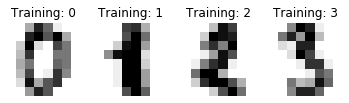

In [169]:
#load in the data
digits = load_digits()

#show ample digits
#taken from: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [170]:
#no need to scale this data
X = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
print(X[1].reshape(8,8))

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


In [171]:
clf = MLPClassifier(solver='lbfgs', random_state = 2, verbose = 2)

layer_list = []
for i in range(4,10):
    layer_list.append((i,))
    for j in range(4,10):
        layer_list.append((i,j))
        for k in range(4,10):
            layer_list.append((i,j,k))

gs = GridSearchCV(clf, cv=5, iid=False, param_grid={
    'hidden_layer_sizes': layer_list
    })

gs.fit(X, y)
print('im done')

im done


In [172]:
print (gs.best_params_)

{'hidden_layer_sizes': (9, 6, 6)}


In [173]:
data_summary = pd.DataFrame(gs.cv_results_)[['param_hidden_layer_sizes','mean_test_score','rank_test_score']]
display(data_summary.sort_values('rank_test_score').head(20))

,param_hidden_layer_sizes,mean_test_score,rank_test_score
233,"(9, 6, 6)",0.885995,1
213,"(8, 9, 8)",0.882624,2
250,"(9, 8, 9)",0.854868,3
229,"(9, 5, 9)",0.852002,4
207,"(8, 8, 9)",0.851441,5
204,"(8, 8, 6)",0.849374,6
165,"(7, 9)",0.848537,7
205,"(8, 8, 7)",0.847768,8
206,"(8, 8, 8)",0.844822,9
212,"(8, 9, 7)",0.838407,10
